# PATTERN MINING

In [345]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from mlxtend.frequent_patterns import fpgrowth

In [346]:
train = pd.read_csv('pp_train.csv')
test = pd.read_csv('pp_test.csv') 
#df = pd.concat([train, test], axis=0, ignore_index=True) #abbiamo unito train e test
df = train

In [347]:
#df.info()

In [348]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

In [349]:
df = df[df["outlier_w_type"] != True]

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14955 entries, 0 to 16130
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                14955 non-null  object 
 1   rating                       14955 non-null  int64  
 2   startYear                    14955 non-null  int64  
 3   endYear                      14214 non-null  float64
 4   runtimeMinutes               10361 non-null  float64
 5   awardWins                    14955 non-null  float64
 6   numVotes                     14955 non-null  int64  
 7   totalImages                  14955 non-null  int64  
 8   totalVideos                  14955 non-null  int64  
 9   totalCredits                 14955 non-null  int64  
 10  criticReviewsTotal           14955 non-null  int64  
 11  titleType                    14955 non-null  object 
 12  awardNominationsExcludeWins  14955 non-null  int64  
 13  canHaveEpisodes      

## Gestione variabili 

### Osservare la distribuzione delle numeriche per binning

In [351]:
# df['startYear'].describe()
#df['totalNominations'].describe()
#df['fill_runtimeMinutes_Bruno'].describe()
# df['totalMedia'].describe()
#df['numVotes'].describe()
# df['totalCredits'].describe()
# df['criticReviewsTotal'].describe()
# df['numRegions'].describe()
# df['userReviewsTotal'].describe()
# df['rating'].describe()

### Trasformazione binaria con valori semanticamente significativi
#### episodes

In [352]:
df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
canhaveeps_dict = {0: "cant_have_episodes", 1: "can_have_episodes"}
df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)
df["canHaveEpisodes"]

C:\Users\Gagia\AppData\Local\Temp\ipykernel_11580\2497733362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
C:\Users\Gagia\AppData\Local\Temp\ipykernel_11580\2497733362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)


0        cant_have_episodes
1        cant_have_episodes
2         can_have_episodes
4        cant_have_episodes
5        cant_have_episodes
                ...        
16125     can_have_episodes
16126    cant_have_episodes
16127    cant_have_episodes
16129    cant_have_episodes
16130    cant_have_episodes
Name: canHaveEpisodes, Length: 14955, dtype: object

### Handling of numerical attributes
Delle seguenti variabili: 'rating', 'startYear', 'numVotes', 'totalCredits', 'criticReviewsTotal', 'numRegions', 'userReviewsTotal',
    'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS',
       'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA',
       'countryOfOrigin_UNK'
       'fill_runtimeMinutes_Bruno', 'totalNominations',
       'totalMedia'

In [353]:
df_copy = df.copy()

##### TotalNominations

In [354]:
# df_copy["log_totalNominations"] = np.log1p(df["totalNominations"])

In [355]:
# #TOTALNOMINATIONS LOG-TRANSFORMED
# log_bins = [-0.01, 0, np.log(5), np.log(20), df_copy['log_totalNominations'].max()]
# labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

# df_copy['log_nom_bin_cut'] = pd.cut(df_copy['log_totalNominations'], 
#                                 bins=log_bins, 
#                                 labels=labels)

# print(df_copy.groupby('log_nom_bin_cut')['totalNominations'].describe())

In [356]:
#TOTALNOMINATIONS NON LOG-TRANSFORMED   
bins = [-1, 0, 2, 10, df_copy['totalNominations'].max()]
labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

df_copy['totalNominations_bin'] = pd.cut(df_copy['totalNominations'], 
                                bins=bins, 
                                labels=labels)

print(df_copy.groupby('totalNominations_bin')['totalNominations'].describe())

                        count       mean        std   min   25%   50%   75%  \
totalNominations_bin                                                          
ZeroNom               12521.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
LowNom                 1372.0   1.333819   0.471748   1.0   1.0   1.0   2.0   
MediumNom               805.0   5.080745   2.041166   3.0   3.0   4.0   6.0   
VeryHighNom             257.0  27.988327  31.506136  11.0  13.0  17.0  28.0   

                        max  
totalNominations_bin         
ZeroNom                 0.0  
LowNom                  2.0  
MediumNom              10.0  
VeryHighNom           306.0  


##### TotalMedia

In [357]:
# df_copy["log_totalMedia"] = np.log1p(df["totalMedia"])

In [358]:
#TOTALMEDIA NON LOG-TRANSFORMED
bins = [-1, 0, 1, 8, 50, df_copy['totalMedia'].max()]
labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
df_copy['media_bin'] = pd.cut(df_copy['totalMedia'], bins=bins, labels=labels)

print(df_copy.groupby('media_bin')['totalMedia'].describe())

                count        mean         std   min   25%   50%    75%     max
media_bin                                                                     
ZeroMedia      3066.0    0.000000    0.000000   0.0   0.0   0.0    0.0     0.0
LowMedia       4378.0    1.000000    0.000000   1.0   1.0   1.0    1.0     1.0
MediumMedia    4608.0    3.853733    1.918766   2.0   2.0   3.0    5.0     8.0
HighMedia      2292.0   19.359948   10.357639   9.0  11.0  16.0   25.0    50.0
VeryHighMedia   611.0  172.929624  339.162580  51.0  66.0  90.0  141.0  3516.0


In [359]:
# #TOTALMEDIA LOG-TRANSFORMED
# log_bins = [-1, 0, 1.61, 3.1, 4.0, np.log(df_copy['totalMedia'].max())]
# labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
# df_copy['log_media_bin'] = pd.cut(df_copy['totalMedia'], bins=log_bins, labels=labels)

# print(df_copy.groupby('log_media_bin')['totalMedia'].describe())

##### fill_runtimeMinutes_Bruno

In [360]:
# df_copy["log_fill_runtimeMinutes_Bruno"] = np.log1p(df["fill_runtimeMinutes_Bruno"])

In [361]:
#FILL_RUNTIMEMINS_BRUNO NON LOG-TRANSFORMED
bins = [0, 30, 60, 90, df_copy['fill_runtimeMinutes_Bruno'].max()]
labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime']

df_copy['runtime_bin'] = pd.cut(df_copy['fill_runtimeMinutes_Bruno'], bins=bins, labels=labels)
print(df_copy.groupby('runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

                 count        mean        std   min   25%   50%    75%    max
runtime_bin                                                                  
VeryLowRuntime  5607.0   19.798823   9.151547   1.0  11.0  22.0   29.0   30.0
LowRuntime      3270.0   48.596330   7.265013  31.0  43.0  47.0   55.0   60.0
MediumRuntime   3426.0   81.906888   7.812311  61.0  77.0  85.0   89.0   90.0
HighRuntime     2652.0  101.624057  12.288163  91.0  94.0  98.0  105.0  220.0


In [362]:
# #FILL_RUNTIMEMINS_BRUNO LOG-TRANSFORMED
# bins = [-np.inf, 2.0, 3.5, 4.5, 5.5, np.inf]
# labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime', 'VeryHighRuntime']

# df_copy['log_runtime_bin'] = pd.cut(
#     df_copy['log_fill_runtimeMinutes_Bruno'],
#     bins=bins,
#     labels=labels,
#     ordered=True)

# print(df_copy.groupby('log_runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

##### rating

In [363]:
#RATING 
bins = [-1, 3, 6, 7, 8, df_copy['rating'].max()]
labels = ['VeryLowRating', 'LowRating', 'MediumRating', 'HighRating', "VeryHighRating"]
df_copy['rating_bin'] = pd.cut(df_copy['rating'], bins=bins, labels=labels)

print(df_copy['rating_bin'].value_counts())
print(df_copy.groupby('rating_bin')['rating'].describe())

rating_bin
HighRating        4378
MediumRating      4127
LowRating         4021
VeryHighRating    2224
VeryLowRating      205
Name: count, dtype: int64
                 count      mean       std  min  25%  50%  75%   max
rating_bin                                                          
VeryLowRating    205.0  2.682927  0.516351  1.0  2.0  3.0  3.0   3.0
LowRating       4021.0  5.521761  0.681187  4.0  5.0  6.0  6.0   6.0
MediumRating    4127.0  7.000000  0.000000  7.0  7.0  7.0  7.0   7.0
HighRating      4378.0  8.000000  0.000000  8.0  8.0  8.0  8.0   8.0
VeryHighRating  2224.0  9.142986  0.350137  9.0  9.0  9.0  9.0  10.0


##### numVotes   >>> max è sgravato

In [364]:
# df_copy["log_numVotes"] = np.log1p(df["numVotes"])

In [365]:
# #NUMVOTES LOG-TRANSFORMED
# bins = [-np.inf, 2.7, 3.9, 5.0, 8.0, np.inf]
# labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']

# # Applicazione
# df_copy['log_numvotes_bin'] = pd.cut(
#     df_copy['log_numVotes'],
#     bins=bins,
#     labels=labels
# )

# print(df_copy.groupby('log_numvotes_bin')['numVotes'].describe())

In [366]:
#NUMVOTES NON LOG-TRANSFORMED
labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']
bins = [4, 15, 50, 150, 1000, float('inf')]  # include il min=5 e max=1.071.372

df_copy['numVotes_bin'] = pd.cut(df['numVotes'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numVotes_bin')['numVotes'].describe())

                count          mean           std     min     25%     50%  \
numVotes_bin                                                                
VeryLowVotes   4049.0      9.990121      2.890868     5.0     8.0    10.0   
LowVotes       4477.0     28.241233      9.580983    16.0    20.0    26.0   
MediumVotes    2736.0     90.189693     27.724992    51.0    66.0    85.0   
HighVotes      2618.0    394.624905    221.316024   151.0   214.0   327.0   
VeryHighVotes  1075.0  14603.161860  54851.447378  1001.0  1511.5  2622.0   

                   75%       max  
numVotes_bin                      
VeryLowVotes     12.00      15.0  
LowVotes         35.00      50.0  
MediumVotes     111.00     150.0  
HighVotes       521.75     997.0  
VeryHighVotes  5629.00  803146.0  


##### StartYear

In [367]:
#STARTYEAR
bins =[
    1878,  # Cinema delle origini e muto
    1930,  # Cinema sonoro classico e radio
    1955,  # TV B/N e colore, cinema widescreen
    1980,  # Video domestico e media transazionali
    2000,  # DVD, internet e mobile
    2015,  # Streaming integrato e nuovi media
    df_copy['startYear'].max()] #era corrente
labels = ['pre-1930', '1930-1954', '1955-1979', '1980-1999', '2000-2019', 'post-2020']
df_copy['startYear_bin'] = pd.cut(df_copy['startYear'], bins=bins, labels=labels)

print(df_copy.groupby('startYear_bin')['startYear'].describe())

                count         mean        std     min     25%     50%     75%  \
startYear_bin                                                                   
pre-1930        459.0  1913.736383  11.594787  1891.0  1904.0  1913.0  1925.0   
1930-1954       951.0  1944.112513   7.463382  1931.0  1938.0  1944.0  1951.0   
1955-1979      2762.0  1969.340333   6.908679  1956.0  1964.0  1970.0  1975.0   
1980-1999      4047.0  1991.322708   5.401675  1981.0  1987.0  1992.0  1996.0   
2000-2019      3775.0  2008.991523   4.115185  2001.0  2006.0  2009.0  2012.0   
post-2020      2960.0  2019.500338   2.379648  2016.0  2017.0  2019.0  2021.0   

                  max  
startYear_bin          
pre-1930       1930.0  
1930-1954      1955.0  
1955-1979      1980.0  
1980-1999      1999.0  
2000-2019      2015.0  
post-2020      2024.0  


##### totalCredits

In [368]:
# df_copy["log_totalCredits"] = np.log1p(df["totalCredits"])

In [369]:
# #TOTALCREDITS LOG-TRANSFORMED
# bins = [-np.inf, 2.0, 3.0, 4.2, 6.0, np.inf]
# labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']

# df_copy['log_totalCredits_bin'] = pd.cut(df_copy['log_totalCredits'], bins=bins, labels=labels)

In [370]:
# print(df_copy.groupby('log_totalCredits_bin')['totalCredits'].describe())

In [371]:
#TOTALCREDITS NON LOG-TRANSFORMED
labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']
bins = [-1, 15, 35, 65, 200, float('inf')]

df_copy['totalCredits_bin'] = pd.cut(df['totalCredits'], bins=bins, labels=labels, include_lowest=True)

In [372]:
print(df_copy.groupby('totalCredits_bin')['totalCredits'].describe())

                   count        mean         std    min    25%    50%    75%  \
totalCredits_bin                                                               
VeryLowCredits    3497.0    8.180440    4.345661    0.0    5.0    8.0   12.0   
LowCredits        4031.0   24.828330    5.718656   16.0   20.0   25.0   30.0   
MediumCredits     3659.0   48.495491    8.396748   36.0   41.0   48.0   55.0   
HighCredits       3117.0  107.148540   35.211921   66.0   78.0   97.0  130.0   
VeryHighCredits    651.0  432.800307  724.161331  201.0  233.5  285.0  409.5   

                      max  
totalCredits_bin           
VeryLowCredits       15.0  
LowCredits           35.0  
MediumCredits        65.0  
HighCredits         200.0  
VeryHighCredits   15742.0  


##### criticReviewsTotal

In [373]:
# df_copy["log_criticReviewsTotal"] = np.log1p(df["criticReviewsTotal"])

In [374]:
# #CRITICREVIEWS LOG-TRANSFORMED
# bins = [-0.01, 0.0, 1.4, 2.3, 3.4, 4.6, np.inf]
# labels = [
#     'NoCriticReviews',
#     'FewCriticReviews',
#     'ModerateCriticReviews',
#     'ManyCriticReviews',
#     'VeryHighCriticReviews',
#     'ExtensiveCriticReviews'
# ]

# df_copy['log_criticReviewsTotal_bin'] = pd.cut(
#     df_copy['log_criticReviewsTotal'],
#     bins=bins,
#     labels=labels
# )

In [375]:
# print(df_copy.groupby('log_criticReviewsTotal_bin')['criticReviewsTotal'].describe())

In [376]:
#CRITICREVIEWS NON LOG-TRANSFORMED
labels = [
    'NoCriticReviews',
    'FewCriticReviews',
    'ModerateCriticReviews',
    'ManyCriticReviews',
    'VeryHighCriticReviews',
    'ExtensiveCriticReviews'
]
bins = [-1, 0, 1, 5, 20, 45, float('inf')]

df_copy['criticReviewsTotal_bin'] = pd.cut(df['criticReviewsTotal'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('criticReviewsTotal_bin')['criticReviewsTotal'].describe())

                          count       mean        std   min   25%   50%  \
criticReviewsTotal_bin                                                    
NoCriticReviews         10435.0   0.000000   0.000000   0.0   0.0   0.0   
FewCriticReviews         1730.0   1.000000   0.000000   1.0   1.0   1.0   
ModerateCriticReviews    1560.0   2.983333   1.070799   2.0   2.0   3.0   
ManyCriticReviews         841.0  10.172414   3.863135   6.0   7.0   9.0   
VeryHighCriticReviews     213.0  29.582160   6.739006  21.0  24.0  28.0   
ExtensiveCriticReviews    176.0  97.215909  63.665097  46.0  56.0  75.0   

                          75%    max  
criticReviewsTotal_bin                
NoCriticReviews           0.0    0.0  
FewCriticReviews          1.0    1.0  
ModerateCriticReviews     4.0    5.0  
ManyCriticReviews        13.0   20.0  
VeryHighCriticReviews    35.0   45.0  
ExtensiveCriticReviews  108.5  439.0  


##### numRegions

In [377]:
# df_copy["log_numRegions"] = np.log1p(df["numRegions"])

In [378]:
# #NUMREGIONS LOG-TRANSFORMED
# bins = [-np.inf, 1.2, 2.0, 3.2, np.inf]
# labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']

# # Applicazione
# df_copy['log_numRegions_bin'] = pd.cut(
#     df_copy['log_numRegions'],
#     bins=bins,
#     labels=labels
# )

In [379]:
# print(df_copy.groupby('log_numRegions_bin')['numRegions'].describe())

In [380]:
#NUMREGIONS NON LOG-TRANSFORMED
labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']
bins = [0, 1, 3, 8, float('inf')]

df_copy['numRegions_bin'] = pd.cut(df['numRegions'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numRegions_bin')['numRegions'].describe())


                  count       mean       std  min   25%   50%   75%   max
numRegions_bin                                                           
VeryFewRegions   8829.0   1.000000  0.000000  1.0   1.0   1.0   1.0   1.0
ModerateRegions  2434.0   2.315530  0.464822  2.0   2.0   2.0   3.0   3.0
ManyRegions      2314.0   5.719965  1.364825  4.0   4.0   6.0   7.0   8.0
GlobalRegions    1378.0  17.775036  9.186373  9.0  11.0  15.0  22.0  62.0


##### userReviewsTotal

In [381]:
# df_copy["log_userReviewsTotal"] = np.log1p(df["userReviewsTotal"])

In [382]:
# #USERREVIEWSTOTAL LOG-TRANSFORMED
# bins = [-0.01, 0.0, 2.8, 5.0, np.inf]
# labels = ['NoUserReviews', 'FewUserReviews', 'ManyUserReviews', 'VeryManyUserReviews']

# # Applicazione
# df_copy['log_userReviewsTotal_bin'] = pd.cut(
#     df_copy['log_userReviewsTotal'],
#     bins=bins,
#     labels=labels)

In [383]:
# print(df_copy.groupby('log_userReviewsTotal_bin')['userReviewsTotal'].describe())

In [384]:
#USERREVIEWSTOTAL NON LOG-TRANSFORMED
labels = ['NoUserReviews', 'FewUserReviews', 'ManyUserReviews', 'VeryManyUserReviews']
bins = [-1, 0, 3, 30, float('inf')]

df_copy['userReviewsTotal_bin'] = pd.cut(df['userReviewsTotal'], bins=bins, labels=labels, include_lowest=True)

In [385]:
print(df_copy.groupby('userReviewsTotal_bin')['userReviewsTotal'].describe())

                       count        mean         std   min    25%   50%  \
userReviewsTotal_bin                                                      
NoUserReviews         8454.0    0.000000    0.000000   0.0   0.00   0.0   
FewUserReviews        3875.0    1.566452    0.739343   1.0   1.00   1.0   
ManyUserReviews       2162.0   10.129972    6.613494   4.0   5.00   8.0   
VeryManyUserReviews    464.0  145.540948  324.193737  31.0  41.75  63.0   

                         75%     max  
userReviewsTotal_bin                  
NoUserReviews           0.00     0.0  
FewUserReviews          2.00     3.0  
ManyUserReviews        13.00    30.0  
VeryManyUserReviews   129.25  5727.0  


##### countryOfOrigin_freqenc

In [386]:
df_copy["countryOfOrigin_freq_enc"].describe()

count    14955.000000
mean         0.196614
std          0.182731
min          0.000056
25%          0.018089
50%          0.098792
75%          0.397061
max          0.658429
Name: countryOfOrigin_freq_enc, dtype: float64

In [387]:
bins = [-0.01, 0.03, 0.3, 1.0]
labels = ['LowFreqCountries', 'MediumFreqCountries', 'HighFreqCountries']

df_copy["country_freq_bin"] = pd.cut(
    df_copy["countryOfOrigin_freq_enc"],
    bins=bins,
    labels=labels
)

In [388]:
print(df_copy.groupby('country_freq_bin')['countryOfOrigin_freq_enc'].describe())

                      count      mean       std       min       25%       50%  \
country_freq_bin                                                                
LowFreqCountries     4559.0  0.011128  0.007641  0.000056  0.005510  0.009406   
MediumFreqCountries  3816.0  0.067012  0.029802  0.030556  0.045973  0.047086   
HighFreqCountries    6580.0  0.400291  0.016326  0.397061  0.397061  0.397061   

                          75%       max  
country_freq_bin                         
LowFreqCountries     0.017532  0.029888  
MediumFreqCountries  0.098792  0.204931  
HighFreqCountries    0.397061  0.658429  


### Handling of categorical attributes

##### countryOfOrigin

In [389]:
# # BINARIZZAZIONE -  ONE HOT ENCODING 
# df_copy['from_Europe_bin'] = (df_copy['countryOfOrigin_EU'] > 0).astype(int)
# df_copy['from_NorthAmerica_bin'] = (df_copy['countryOfOrigin_NA'] > 0).astype(int)
# df_copy['from_SouthAmerica_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Asia_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Oceania_bin'] = (df_copy['countryOfOrigin_OC'] > 0).astype(int)
# df_copy['from_Africa_bin'] = (df_copy['countryOfOrigin_AF'] > 0).astype(int)
# df_copy['from_Unknown_bin'] = (df_copy['countryOfOrigin_UNK'] > 0).astype(int)


In [390]:
# BINARIZZAZIONE 
def discretize_continent_count(df, col_name, cont):
    new_col = f'{cont }_bin'
    
    def label(value):
        if value == 0:
            return f'not_{cont}'
       # elif value == 1:
        #    return f'one_{cont}'
        else:
            return f'is_{cont}'
    
    df[new_col] = df[col_name].apply(label)

# applico funzione
discretize_continent_count(df_copy, "countryOfOrigin_NA", "from_NorthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_EU", "from_Europe")
discretize_continent_count(df_copy, "countryOfOrigin_SA", "from_SouthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_AS", "from_Asia")
discretize_continent_count(df_copy, "countryOfOrigin_OC", "from_Oceania")
discretize_continent_count(df_copy, "countryOfOrigin_AF", "from_Africa")
discretize_continent_count(df_copy, "countryOfOrigin_UNK", "from_Unknown")

In [391]:
df_copy.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,numRegions_bin,userReviewsTotal_bin,country_freq_bin,from_NorthAmerica_bin,from_Europe_bin,from_SouthAmerica_bin,from_Asia_bin,from_Oceania_bin,from_Africa_bin,from_Unknown_bin
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,1995.0,NaN,0.0,779,1,0,21,...,VeryFewRegions,NoUserReviews,HighFreqCountries,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
1,Idealnaya para,6,1992,1992.0,NaN,0.0,38,1,0,24,...,VeryFewRegions,FewUserReviews,LowFreqCountries,not_from_NorthAmerica,is_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
2,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,VeryFewRegions,NoUserReviews,LowFreqCountries,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
4,Lightdance,9,1995,1995.0,34.0,0.0,14,1,0,0,...,VeryFewRegions,FewUserReviews,HighFreqCountries,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
5,"Kiss, Kiss Bang, Bang",8,1995,1995.0,45.0,0.0,96,5,0,110,...,VeryFewRegions,NoUserReviews,HighFreqCountries,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown


## Pattern Mining

### Transactions Creation

In [392]:
df_copy.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

In [393]:
cols = [
        #"canHaveEpisodes", 
        #"isAdult",
        #"totalNominations_bin", 
        #"media_bin",
        "rating_bin", "runtime_bin", "numVotes_bin", 
        #"startYear_bin",
        "totalCredits_bin", 
        "criticReviewsTotal_bin", 
        # "country_freq_bin",
        # "numRegions_bin", 
        "userReviewsTotal_bin",
        "titleType",
        'from_NorthAmerica_bin','from_Europe_bin' , 'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 
        #'from_Unknown_bin'
]


# #FUNZIONANTI COME BASE
#     #     "canHaveEpisodes", "isAdult",
#     #     "totalNominations_bin", "media_bin"
#           "rating_bin", "runtime_bin", "numVotes_bin", "startYear_bin",
#     #     "totalCredits_bin", "criticReviewsTotal_bin", "numRegions_bin", "userReviewsTotal_bin"
#           "titleType",
#           'from_NorthAmerica_bin', 'from_Europe_bin' ,'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'

#TUTTE
    #     "canHaveEpisodes", "isAdult",
    #     "totalNominations_bin", "media_bin"
    #     "rating_bin", "runtime_bin", "numVotes_bin", "startYear_bin",
    #     "totalCredits_bin", "criticReviewsTotal_bin", "numRegions_bin", "userReviewsTotal_bin"
    #     "titleType",
    #      'from_NorthAmerica_bin', 'from_Europe_bin' ,'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'




In [394]:
transactions = []

for index, row in df_copy[cols].iterrows():
    transaction = []
    for col in cols:
        value = str(row[col])
        if not value.startswith('not_'):  # Ignora 'none_from_*'
            transaction.append(value)
    transactions.append(transaction)

# Verifica risultato
print(len(transactions))
print(transactions[10:15])


14955
[['VeryLowRating', 'MediumRuntime', 'HighVotes', 'HighCredits', 'FewCriticReviews', 'ManyUserReviews', 'movie', 'is_from_NorthAmerica'], ['MediumRating', 'MediumRuntime', 'HighVotes', 'HighCredits', 'FewCriticReviews', 'FewUserReviews', 'movie', 'is_from_Europe'], ['VeryHighRating', 'VeryLowRuntime', 'VeryHighVotes', 'HighCredits', 'ModerateCriticReviews', 'ManyUserReviews', 'tvEpisode', 'is_from_NorthAmerica'], ['VeryHighRating', 'LowRuntime', 'VeryLowVotes', 'LowCredits', 'NoCriticReviews', 'NoUserReviews', 'tvEpisode', 'is_from_Asia'], ['MediumRating', 'VeryLowRuntime', 'VeryLowVotes', 'VeryLowCredits', 'NoCriticReviews', 'NoUserReviews', 'short', 'is_from_Europe']]


In [395]:
# Let's utilize TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_apriori = pd.DataFrame(te_array, columns=te.columns_)

# Visualizza le prime righe per assicurarti che la trasformazione sia corretta
print(df_apriori.head())

   ExtensiveCriticReviews  FewCriticReviews  FewUserReviews  HighCredits  \
0                   False              True           False        False   
1                   False             False            True        False   
2                   False             False           False        False   
3                   False             False            True        False   
4                   False             False           False         True   

   HighRating  HighRuntime  HighVotes  LowCredits  LowRating  LowRuntime  ...  \
0        True        False       True        True      False       False  ...   
1       False         True      False        True       True       False  ...   
2       False        False      False       False       True       False  ...   
3       False        False      False       False      False        True  ...   
4        True        False      False       False      False        True  ...   

   is_from_Oceania  is_from_SouthAmerica  movie  short  

### Confronto itemset per support

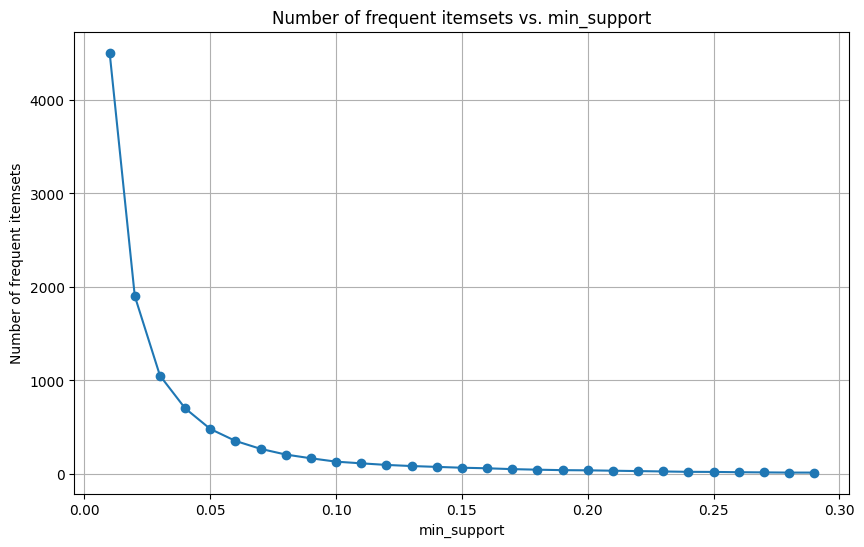

In [396]:
# Genera una lista di min_sup da testare
min_sups = [round(x, 2) for x in list(np.arange(0.01, 0.3, 0.01))]

# Lista per salvare il numero di itemset per ciascun supporto
num_itemsets = []

# Calcolo degli itemset frequenti per ogni min_sup
for min_sup in min_sups:
    frequent_itemsets = apriori(df_apriori, min_support=min_sup, use_colnames=True)
    num_itemsets.append(len(frequent_itemsets))

# Plot
plt.figure(figsize=(10,6))
plt.plot(min_sups, num_itemsets, marker='o')
plt.title('Number of frequent itemsets vs. min_support')
plt.xlabel('min_support')
plt.ylabel('Number of frequent itemsets')
plt.grid(True)
plt.show()


### Apriori - frequent pattern analysis

In [397]:
min_support = 0.08  # % supporto minimo
min_confidence = 0.6  # 60% confidenza minima --> serve dopo nella fase di rules extraction

# Apriori
frequent_itemsets_apriori = apriori(df_apriori, min_support=min_support, use_colnames=True)

# FRA -< Filtra gli itemset con almeno 2 item (lunghezza >= 2)
    #frequent_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x) >= 2)]
    #frequent_itemsets_apriori.reset_index(drop=True, inplace=True)

print(frequent_itemsets_apriori.info())
print(frequent_itemsets_apriori.head(51))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   205 non-null    float64
 1   itemsets  205 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.3+ KB
None
     support                                itemsets
0   0.115680                      (FewCriticReviews)
1   0.259111                        (FewUserReviews)
2   0.208425                           (HighCredits)
3   0.292745                            (HighRating)
4   0.177332                           (HighRuntime)
5   0.175059                             (HighVotes)
6   0.269542                            (LowCredits)
7   0.268873                             (LowRating)
8   0.218656                            (LowRuntime)
9   0.299365                              (LowVotes)
10  0.144567                       (ManyUserReviews)
11  0.244667                         (MediumCre

In [398]:
frequent_patterns_sorted = frequent_itemsets_apriori.sort_values(by='support', ascending=False)
print(frequent_patterns_sorted)

      support                                           itemsets
16   0.697760                                  (NoCriticReviews)
17   0.565296                                    (NoUserReviews)
98   0.492143                   (NoUserReviews, NoCriticReviews)
24   0.485323                             (is_from_NorthAmerica)
20   0.374925                                   (VeryLowRuntime)
..        ...                                                ...
195  0.080976  (NoCriticReviews, LowVotes, NoUserReviews, is_...
143  0.080976      (VeryLowRuntime, LowCredits, NoCriticReviews)
121  0.080843                   (is_from_Europe, VeryLowCredits)
204  0.080508  (short, VeryLowRuntime, NoCriticReviews, VeryL...
30   0.080107                         (FewUserReviews, LowVotes)

[205 rows x 2 columns]


In [399]:
# Extract itemsets with highest support for size 2, 3, and 4
result = {}

for k in [1, 2, 3]:
    # Filter itemsets of length k
    itemsets_k = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x) == k)]
    if not itemsets_k.empty:
        max_support = itemsets_k['support'].max()
        top_itemsets = itemsets_k[itemsets_k['support'] == max_support]
        result[k] = top_itemsets
        print(f"\nTop itemsets of size {k} (support={max_support}):")
        print(top_itemsets)
    else:
        print(f"\nNo itemsets of size {k} found.")


Top itemsets of size 1 (support=0.6977599465061852):
    support           itemsets
16  0.69776  (NoCriticReviews)

Top itemsets of size 2 (support=0.49214309595453026):
     support                          itemsets
98  0.492143  (NoUserReviews, NoCriticReviews)

Top itemsets of size 3 (support=0.2235372785021732):
      support                                        itemsets
164  0.223537  (NoUserReviews, NoCriticReviews, VeryLowVotes)


### maximal itemset

In [400]:
# Find maximal itemsets (those that are not subsets of any other itemsets)
maximal_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: not any(x < y for y in frequent_itemsets_apriori['itemsets']))]

# Display the results
print(maximal_itemsets_apriori.info())
print(maximal_itemsets_apriori.head(15))

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 204
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   88 non-null     float64
 1   itemsets  88 non-null     object 
dtypes: float64(1), object(1)
memory usage: 2.1+ KB
None
     support                             itemsets
0   0.115680                   (FewCriticReviews)
15  0.104313              (ModerateCriticReviews)
28  0.087997                           (tvSeries)
29  0.082514         (FewUserReviews, HighRating)
30  0.080107           (FewUserReviews, LowVotes)
32  0.099164     (FewUserReviews, VeryLowRuntime)
33  0.083718     (is_from_Europe, FewUserReviews)
35  0.083183              (FewUserReviews, movie)
36  0.112872       (HighCredits, NoCriticReviews)
37  0.088532         (HighCredits, NoUserReviews)
38  0.127248  (HighCredits, is_from_NorthAmerica)
39  0.091742             (HighCredits, tvEpisode)
40  0.093949             (HighRating, L

### Association Rules

In [401]:
#Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)
rules_apriori.info()
rules_apriori.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         158 non-null    object 
 1   consequents         158 non-null    object 
 2   antecedent support  158 non-null    float64
 3   consequent support  158 non-null    float64
 4   support             158 non-null    float64
 5   confidence          158 non-null    float64
 6   lift                158 non-null    float64
 7   representativity    158 non-null    float64
 8   leverage            158 non-null    float64
 9   conviction          158 non-null    float64
 10  zhangs_metric       158 non-null    float64
 11  jaccard             158 non-null    float64
 12  certainty           158 non-null    float64
 13  kulczynski          158 non-null    float64
dtypes: float64(12), object(2)
memory usage: 17.4+ KB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(FewUserReviews),(NoCriticReviews),0.259111,0.697760,0.166566,0.642839,0.921289,1.0,-0.014231,0.846228,-0.103392,0.210762,-0.181714,0.440777
1,(HighCredits),(is_from_NorthAmerica),0.208425,0.485323,0.127248,0.610523,1.257973,1.0,0.026095,1.321457,0.259067,0.224622,0.243260,0.436358
2,(HighRating),(NoCriticReviews),0.292745,0.697760,0.211635,0.722933,1.036077,1.0,0.007369,1.090855,0.049233,0.271720,0.083288,0.513120
3,(HighRuntime),(movie),0.177332,0.318556,0.153594,0.866139,2.718956,1.0,0.097104,5.090677,0.768490,0.448720,0.803562,0.674148
4,(LowCredits),(NoCriticReviews),0.269542,0.697760,0.204280,0.757876,1.086156,1.0,0.016204,1.248289,0.108593,0.267724,0.198903,0.525321
5,(LowCredits),(NoUserReviews),0.269542,0.565296,0.169977,0.630613,1.115545,1.0,0.017606,1.176825,0.141797,0.255657,0.150256,0.465649
6,(LowRating),(NoCriticReviews),0.268873,0.697760,0.175125,0.651331,0.933459,1.0,-0.012484,0.866838,-0.088837,0.221255,-0.153618,0.451156
7,(LowRuntime),(NoCriticReviews),0.218656,0.697760,0.169910,0.777064,1.113656,1.0,0.017340,1.355727,0.130616,0.227607,0.262388,0.510286
8,(LowRuntime),(NoUserReviews),0.218656,0.565296,0.136075,0.622324,1.100882,1.0,0.012470,1.150998,0.117282,0.210032,0.131189,0.431519
9,(LowRuntime),(tvEpisode),0.218656,0.303310,0.143765,0.657492,2.167724,1.0,0.077444,2.034086,0.689436,0.380127,0.508379,0.565739


### Scelta valori confidence

In [402]:
from mlxtend.frequent_patterns import association_rules

conf_values = [0.4, 0.5, 0.6, 0.7]
for c in conf_values:
    rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=c)
    print(f"min_confidence={c}: {len(rules)} regole trovate, lift medio = {rules['lift'].mean():.2f}")


min_confidence=0.4: 335 regole trovate, lift medio = 1.49
min_confidence=0.5: 226 regole trovate, lift medio = 1.51
min_confidence=0.6: 158 regole trovate, lift medio = 1.51
min_confidence=0.7: 108 regole trovate, lift medio = 1.51


In [403]:
rules_apriori.sort_values(by="lift", axis=0, ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
157,"(VeryLowRuntime, VeryLowCredits)","(short, NoCriticReviews)",0.127716,0.132130,0.080508,0.630366,4.770815,1.0,0.063633,2.347921,0.906118,0.448919,0.574091,0.619839
155,"(short, NoCriticReviews)","(VeryLowRuntime, VeryLowCredits)",0.132130,0.127716,0.080508,0.609312,4.770815,1.0,0.063633,2.232684,0.910726,0.448919,0.552109,0.619839
122,"(VeryLowRuntime, VeryLowCredits)",(short),0.127716,0.160013,0.093347,0.730890,4.567681,1.0,0.072910,3.121351,0.895432,0.480220,0.679626,0.657129
154,"(NoCriticReviews, VeryLowRuntime, VeryLowCredits)",(short),0.113206,0.160013,0.080508,0.711164,4.444401,1.0,0.062394,2.908175,0.873932,0.417765,0.656142,0.607149
143,"(NoUserReviews, short)","(VeryLowRuntime, NoCriticReviews)",0.101304,0.304514,0.091006,0.898350,2.950115,1.0,0.060158,6.841961,0.735544,0.289082,0.853843,0.598604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,(MediumRating),(NoCriticReviews),0.275961,0.697760,0.183885,0.666344,0.954975,1.0,-0.008670,0.905842,-0.061136,0.232814,-0.103945,0.464940
37,"(FewUserReviews, is_from_NorthAmerica)",(NoCriticReviews),0.137479,0.697760,0.090405,0.657588,0.942427,1.0,-0.005523,0.882678,-0.066143,0.121375,-0.132916,0.393576
25,(is_from_NorthAmerica),(NoCriticReviews),0.485323,0.697760,0.317151,0.653486,0.936548,1.0,-0.021487,0.872230,-0.116325,0.366255,-0.146487,0.554007
6,(LowRating),(NoCriticReviews),0.268873,0.697760,0.175125,0.651331,0.933459,1.0,-0.012484,0.866838,-0.088837,0.221255,-0.153618,0.451156


### Target Prediction: various attempts (find the most informative one)

In [404]:
# Filtro le regole con "nord america" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'is_from_NorthAmerica'})]


# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                     antecedents             consequents  antecedent support  \
12             (ManyUserReviews)  (is_from_NorthAmerica)            0.144567   
43       (tvEpisode, HighRating)  (is_from_NorthAmerica)            0.143765   
59       (tvEpisode, LowRuntime)  (is_from_NorthAmerica)            0.143765   
36                   (tvEpisode)  (is_from_NorthAmerica)            0.303310   
124  (tvEpisode, VeryLowRuntime)  (is_from_NorthAmerica)            0.153059   
1                  (HighCredits)  (is_from_NorthAmerica)            0.208425   

     consequent support   support  confidence      lift  representativity  \
12             0.485323  0.095620    0.661425  1.362855               1.0   
43             0.485323  0.091876    0.639070  1.316794               1.0   
59             0.485323  0.089669    0.623721  1.285168               1.0   
36             0.485323  0.185690    0.612213  1.261457               1.0   
124            0.485323  0.093547    0.611184  1.25933

In [405]:
# Filter the rule where the consequent contains "is_from_NorthAmerica"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'is_from_NorthAmerica' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'is_from_NorthAmerica' in the consequents.")


To predict: is_from_NorthAmerica
How? HighCredits


In [408]:
# Filtro le regole con "low runtime" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'ManyUserReviews'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [407]:
# Filter the rule where the consequent contains "HighRated"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'ManyUserReviews' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'LowRuntime' in the consequents.")


No rules found with 'LowRuntime' in the consequents.
